### Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [24]:
def plot_svm_decision_boundary(vm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # at the decision boundary w0x0 + W1x1 + b = 0
    # => x1 = -w0/w1x0 - b/w1
    
    x0 = np.linspace(xmin, xmax, 200)
    dec_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    gutter_up = dec_boundary + margin
    gutter_down = dec_boundary - margin
    
    svs = svm_clf.support_vectors_
    
    plt.scatter(svs[:,0], svs[:,1], s=100, facecolors="red")
    plt.plot(x0, dec_boundary, 'r--', lw = 2)
    plt.plot(x0, gutter_up, 'k-', lw=2)
    plt.plot(x0, gutter_down, 'k-', lw=2)

In [10]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()

In [19]:
y = iris['target']
X = iris['data'][:, (2,3)] #petal length and petal width

In [21]:
setosa_or_verginica = (y==0) | (y==1)
X = X[setosa_or_verginica]
y = y[setosa_or_verginica] 

In [13]:
svm_clf = SVC(kernel = 'linear', C=float('inf'))
svm_clf.fit(X,y)
svm_clf.predict([[2.4,3.1]])

array([1])

In [ ]:
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(12,10))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf.fit(X_scaled,y)

plt.plot(X_scaled[:,0][y==1], X_scaled[:,1], 'bo')
plt.plot(X_scaled[:,0][y==0], X_scaled[:,1], 'ms')

plot_svm_decision_boundary(svm_clf, -2, 2)
plt.xlabel('Petal width normalized', fontsize=10)
plt.ylabel('Petal length normalized', fontsize=10)
plt.title('Scaled', fontsize=14)
plt.axis([-2,2,-2,2]);

In [18]:
X.shape, y.shape

((100, 2), (100,))

### Nonlinear SVC 

In [63]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [64]:
# construct some datasets
X,y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [84]:
# define a function

def plot_dataset(X,y,axs):
    plt.plot(X[:,0][y==0], X[:,1][y==0],'D', c='r')
    plt.plot(X[:,0][y==1], X[:,1][y==1],'X')
    plt.axis(axs)
    #plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation = 0)
    plt.title('Nonlinear SVM/n/n', fontsize=18)

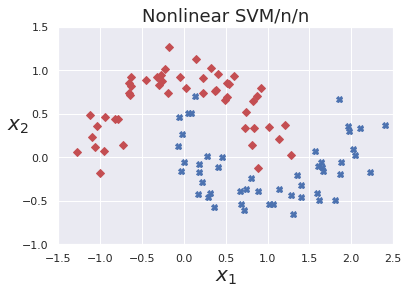

In [85]:
plot_dataset(X, y, [-1.5,2.5,-1,1.5]);

### prediction function

def plot_prediction(clf, axis):
    x0s = np.linspace(axis[0], axis[1], 100)
    x1s = np.linspace(axis[2], axis[3], 100)
    x0,x1 = np.meshgrid(x0s, x1s)
    
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_dec = clf.decision_function(X).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_dec, cmap=plt.cm.brg, alpha=0.2)

In [69]:
# create a pipeline to polynomial of degree 3

polynomial_svm_clf = Pipeline((('poly_feature', PolynomialFeatures(degree=3)),
                         ('scaler', StandardScaler()),
                         ('svm_clf', SVC(kernel='poly', degree=10, coef0=1, C=5))
                       ))

# call the pipline
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_feature', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

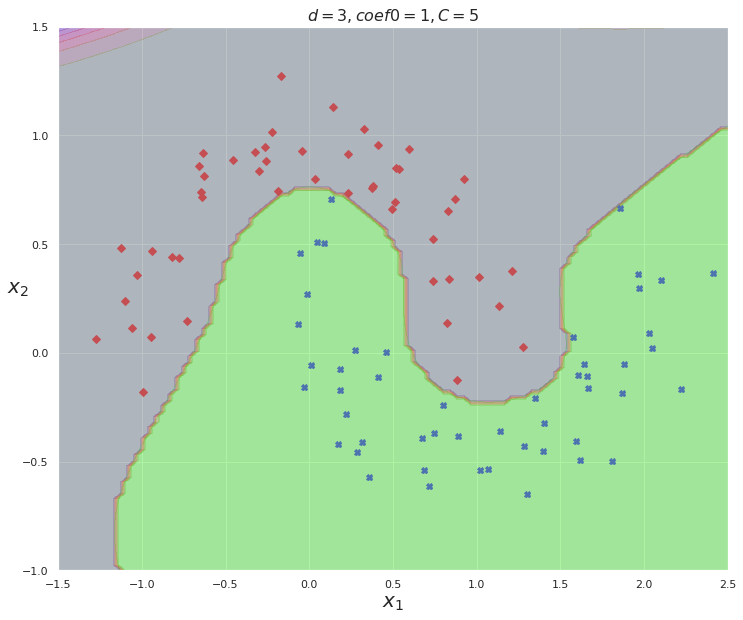

In [86]:
plt.figure(figsize=(12,10))

plot_prediction(polynomial_svm_clf, [-1.5,2.5,-1,1.5])

# plot the dataset
plot_dataset(X,y, [-1.5,2.5,-1,1.5])
plt.title(r'$d=3, coef0=1, C=5$', fontsize=16);

### try to change the polynomial SVC kernel with RBF kernel